### Data Preprocessing

#### Importing Necessary Libraries

In [1]:
# Importing required lib
import pandas as pd
import numpy as np
import random
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading Dataset

In [2]:
# Reading Tweet data which is in csv format
data_out = pd.read_csv("Tweets.csv")

In [3]:
#this will help us to see 10 data from upside
data_out.head(10)

,tweet_id,Label,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.700000e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.700000e+17,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.700000e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.700000e+17,positive,0.6745,NaN,0.0,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,24-02-2015 11:13,San Francisco CA,Pacific Time (US & Canada)
4,5.700000e+17,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,24-02-2015 11:12,Los Angeles,Pacific Time (US & Canada)
5,5.700000e+17,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,24-02-2015 11:11,San Diego,Pacific Time (US & Canada)
6,5.700000e+17,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,24-02-2015 10:53,Los Angeles,Eastern Time (US & Canada)
7,5.700000e+17,neutral,0.6769,NaN,0.0,Virgin America,NaN,idk_but_youtube,NaN,0,@VirginAmerica did you know that suicide is th...,NaN,24-02-2015 10:48,1/1 loner squad,Eastern Time (US & Canada)
8,5.700000e+17,positive,1.0000,NaN,NaN,Virgin America,NaN,HyperCamiLax,NaN,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,NaN,24-02-2015 10:30,NYC,America/New_York
9,5.700000e+17,positive,1.0000,NaN,NaN,Virgin America,NaN,HyperCamiLax,NaN,0,@VirginAmerica This is such a great deal! Alre...,NaN,24-02-2015 10:30,NYC,America/New_York


In [4]:
# This helps to see number of rows and number of columns
data_out.shape

(14505, 15)

In [5]:
# This helps us to know Data type, count and we can see if the data is Null
data_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14505 entries, 0 to 14504
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14505 non-null  float64
 1   Label                         14505 non-null  object 
 2   airline_sentiment_confidence  14505 non-null  float64
 3   negativereason                9043 non-null   object 
 4   negativereason_confidence     10387 non-null  float64
 5   airline                       14505 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14505 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14505 non-null  int64  
 10  text                          14505 non-null  object 
 11  tweet_coord                   1004 non-null   object 
 12  tweet_created                 14505 non-null  object 
 13  t

In [6]:
# to See data type of each column
data_out.dtypes

tweet_id                        float64
Label                            object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [7]:
# To see number of rows and number of cloumns
print('Number of columns :  ', len(data_out.columns))
print('Number of rows :  ', len(data_out))

Number of columns :   15
Number of rows :   14505


#### Labeled Data Count

In [8]:
data_out["Label"].value_counts()

negative    9043
neutral     3099
positive    2363
Name: Label, dtype: int64

#### Checking how many data present in each class

<AxesSubplot:xlabel='Label', ylabel='count'>

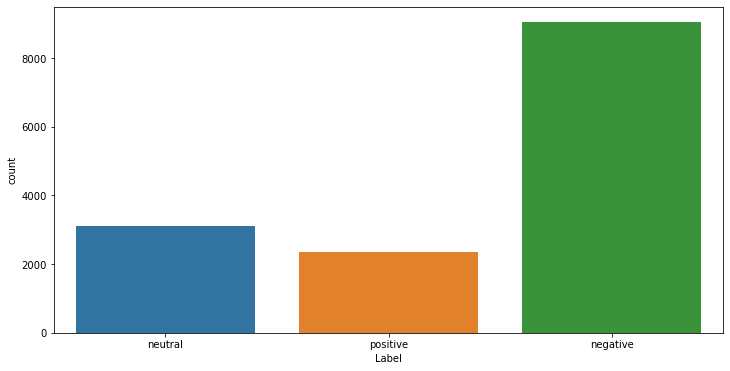

In [9]:
# Plotiing in categorical
plt.figure(figsize=(12,6))
sns.countplot(x='Label',data=data_out)

#### Dropping the unwanted columns

In [10]:
output = data_out.drop(labels=['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 
                               'airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','tweet_coord',
                               'tweet_created','tweet_location','user_timezone'], axis=1)

In [11]:
output

,Label,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,positive,"@VirginAmerica yes, nearly every time I fly VX..."
4,neutral,@VirginAmerica Really missed a prime opportuni...
...,...,...
14500,positive,@AmericanAir thank you we got on a different f...
14501,negative,@AmericanAir leaving over 20 minutes Late Flig...
14502,neutral,@AmericanAir Please bring American Airlines to...
14503,negative,"@AmericanAir you have my money, you change my ..."


#### Renaming the column

In [12]:
output.rename(columns = {'text':'Text'}, inplace = True)

In [13]:
output

,Label,Text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,positive,"@VirginAmerica yes, nearly every time I fly VX..."
4,neutral,@VirginAmerica Really missed a prime opportuni...
...,...,...
14500,positive,@AmericanAir thank you we got on a different f...
14501,negative,@AmericanAir leaving over 20 minutes Late Flig...
14502,neutral,@AmericanAir Please bring American Airlines to...
14503,negative,"@AmericanAir you have my money, you change my ..."


#### Converting text in Lower case

In [14]:
output['Lower Tweet']=output['Text'].str.lower()

In [15]:
output.head()

,Label,Text,Lower Tweet
0,neutral,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...,@virginamerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,@virginamerica i didn't today... must mean i n...
3,positive,"@VirginAmerica yes, nearly every time I fly VX...","@virginamerica yes, nearly every time i fly vx..."
4,neutral,@VirginAmerica Really missed a prime opportuni...,@virginamerica really missed a prime opportuni...


#### Define a function to clean the text

In [16]:
# Removes all special characters and numericals leaving the alphabets
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

In [17]:
# Cleaning the text in the review column
output['Cleaned Reviews'] = output['Lower Tweet'].apply(clean)

In [18]:
output.head()

,Label,Text,Lower Tweet,Cleaned Reviews
0,neutral,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.,virginamerica what dhepburn said
1,positive,@VirginAmerica plus you've added commercials t...,@virginamerica plus you've added commercials t...,virginamerica plus you ve added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,@virginamerica i didn't today... must mean i n...,virginamerica i didn t today must mean i need...
3,positive,"@VirginAmerica yes, nearly every time I fly VX...","@virginamerica yes, nearly every time i fly vx...",virginamerica yes nearly every time i fly vx ...
4,neutral,@VirginAmerica Really missed a prime opportuni...,@virginamerica really missed a prime opportuni...,virginamerica really missed a prime opportuni...


#### Define a function to remove Stopwords

In [19]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [20]:
STOPWORDS = set(stopwordlist)

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [21]:
output['Remove Stopwords'] = output['Cleaned Reviews'].apply(lambda text: cleaning_stopwords(text))

In [22]:
output.head()

,Label,Text,Lower Tweet,Cleaned Reviews,Remove Stopwords
0,neutral,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.,virginamerica what dhepburn said,virginamerica dhepburn said
1,positive,@VirginAmerica plus you've added commercials t...,@virginamerica plus you've added commercials t...,virginamerica plus you ve added commercials t...,virginamerica plus added commercials experienc...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,@virginamerica i didn't today... must mean i n...,virginamerica i didn t today must mean i need...,virginamerica didn today must mean need take a...
3,positive,"@VirginAmerica yes, nearly every time I fly VX...","@virginamerica yes, nearly every time i fly vx...",virginamerica yes nearly every time i fly vx ...,virginamerica yes nearly every time fly vx ear...
4,neutral,@VirginAmerica Really missed a prime opportuni...,@virginamerica really missed a prime opportuni...,virginamerica really missed a prime opportuni...,virginamerica really missed prime opportunity ...


#### Define a function to remove url in text

In [23]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

In [24]:
output['Clean urls'] = output['Remove Stopwords'].apply(lambda x: cleaning_URLs(x))

In [25]:
output.head()

,Label,Text,Lower Tweet,Cleaned Reviews,Remove Stopwords,Clean urls
0,neutral,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.,virginamerica what dhepburn said,virginamerica dhepburn said,virginamerica dhepburn said
1,positive,@VirginAmerica plus you've added commercials t...,@virginamerica plus you've added commercials t...,virginamerica plus you ve added commercials t...,virginamerica plus added commercials experienc...,virginamerica plus added commercials experienc...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,@virginamerica i didn't today... must mean i n...,virginamerica i didn t today must mean i need...,virginamerica didn today must mean need take a...,virginamerica didn today must mean need take a...
3,positive,"@VirginAmerica yes, nearly every time I fly VX...","@virginamerica yes, nearly every time i fly vx...",virginamerica yes nearly every time i fly vx ...,virginamerica yes nearly every time fly vx ear...,virginamerica yes nearly every time fly vx ear...
4,neutral,@VirginAmerica Really missed a prime opportuni...,@virginamerica really missed a prime opportuni...,virginamerica really missed a prime opportuni...,virginamerica really missed prime opportunity ...,virginamerica really missed prime opportunity ...


#### Define a function to delete numbers from text

In [26]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [27]:
output['Remove Number'] = output['Clean urls'].apply(lambda x: cleaning_numbers(x))
output.head()

,Label,Text,Lower Tweet,Cleaned Reviews,Remove Stopwords,Clean urls,Remove Number
0,neutral,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.,virginamerica what dhepburn said,virginamerica dhepburn said,virginamerica dhepburn said,virginamerica dhepburn said
1,positive,@VirginAmerica plus you've added commercials t...,@virginamerica plus you've added commercials t...,virginamerica plus you ve added commercials t...,virginamerica plus added commercials experienc...,virginamerica plus added commercials experienc...,virginamerica plus added commercials experienc...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,@virginamerica i didn't today... must mean i n...,virginamerica i didn t today must mean i need...,virginamerica didn today must mean need take a...,virginamerica didn today must mean need take a...,virginamerica didn today must mean need take a...
3,positive,"@VirginAmerica yes, nearly every time I fly VX...","@virginamerica yes, nearly every time i fly vx...",virginamerica yes nearly every time i fly vx ...,virginamerica yes nearly every time fly vx ear...,virginamerica yes nearly every time fly vx ear...,virginamerica yes nearly every time fly vx ear...
4,neutral,@VirginAmerica Really missed a prime opportuni...,@virginamerica really missed a prime opportuni...,virginamerica really missed a prime opportuni...,virginamerica really missed prime opportunity ...,virginamerica really missed prime opportunity ...,virginamerica really missed prime opportunity ...


In [28]:
# importing nltk for data preprocessing/cleaning
import nltk

In [29]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

In [30]:
output['Stemmer Text']= output['Remove Number'].apply(lambda x: stemming_on_text(x))
output.head()

,Label,Text,Lower Tweet,Cleaned Reviews,Remove Stopwords,Clean urls,Remove Number,Stemmer Text
0,neutral,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.,virginamerica what dhepburn said,virginamerica dhepburn said,virginamerica dhepburn said,virginamerica dhepburn said,virginamerica dhepburn said
1,positive,@VirginAmerica plus you've added commercials t...,@virginamerica plus you've added commercials t...,virginamerica plus you ve added commercials t...,virginamerica plus added commercials experienc...,virginamerica plus added commercials experienc...,virginamerica plus added commercials experienc...,virginamerica plus added commercials experienc...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,@virginamerica i didn't today... must mean i n...,virginamerica i didn t today must mean i need...,virginamerica didn today must mean need take a...,virginamerica didn today must mean need take a...,virginamerica didn today must mean need take a...,virginamerica didn today must mean need take a...
3,positive,"@VirginAmerica yes, nearly every time I fly VX...","@virginamerica yes, nearly every time i fly vx...",virginamerica yes nearly every time i fly vx ...,virginamerica yes nearly every time fly vx ear...,virginamerica yes nearly every time fly vx ear...,virginamerica yes nearly every time fly vx ear...,virginamerica yes nearly every time fly vx ear...
4,neutral,@VirginAmerica Really missed a prime opportuni...,@virginamerica really missed a prime opportuni...,virginamerica really missed a prime opportuni...,virginamerica really missed prime opportunity ...,virginamerica really missed prime opportunity ...,virginamerica really missed prime opportunity ...,virginamerica really missed prime opportunity ...


### Machine Learning Model Implementation

###### Implementing Supervised Machine Learning Algorithim - Random Forest

#### Creating Random Forest Classification model 

In [31]:
#Importing Model Libraries
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pickle

In [32]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(output['Stemmer Text']).toarray()
final_features.shape

(14505, 9050)

In [33]:
# This block is to split the dataset into training and testing set 
X = output['Stemmer Text']
Y = output['Label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [34]:
# Instead of doing these steps one at a time, we can use a pipeline to complete then all at once
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', RandomForestClassifier())])

In [35]:
from sklearn.metrics import f1_score, accuracy_score
# Fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, y_train)

# Saving the Model as pickle file
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(model, f)

ytest = np.array(y_test)

In [36]:
# Calculating Accuracy of Model on test data
accuracy_score(ytest, model.predict(X_test))

0.7350427350427351

In [37]:
# Classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.79      0.89      0.84      2265
     neutral       0.54      0.41      0.46       779
    positive       0.68      0.58      0.63       583

    accuracy                           0.74      3627
   macro avg       0.67      0.63      0.64      3627
weighted avg       0.72      0.74      0.72      3627



In [38]:
# Ploating Confusion matrix 
print(confusion_matrix(ytest, model.predict(X_test)))

[[2009  184   72]
 [ 373  317   89]
 [ 152   91  340]]
